In [7]:
import matplotlib.pyplot as plt

# Importante
sube_analysis_playground.ipynb tiene que correr primero.


In [8]:
# Retrieve previously stored vars
%store -r df
%store -r years
df

,indice_tiempo,total,colectivo,lancha,subte,tren
0,2020-01-01,966457,907421,40,72180,112267
1,2020-01-02,3879833,3564004,94,511136,719721
2,2020-01-03,4213711,3886005,106,536129,779512
3,2020-01-04,2899714,2728108,129,232491,461000
4,2020-01-05,1785016,1687791,94,127770,203694
...,...,...,...,...,...,...
1628,2024-06-17,1919584,1819782,712,121361,219517
1629,2024-06-18,5357011,5064390,975,453898,706859
1630,2024-06-19,5416986,5146011,1227,419124,717365
1631,2024-06-20,2242155,2108424,1140,162581,286177


In [9]:
# Like I did previously with years, I will obtain all months for 'indice_tiempo'column
months = list({i for i in df['indice_tiempo'].dt.month})

# variables used if a non-complete year is used in the dataset
current_year = 2024
last_month_as_today = 5
year_still_in_progress = True # Used in future cell

# Basic setup for storing monthly averages per year in a dictionary
amount_of_monthly_registries_per_year = {}
for year in years:
    amount_of_monthly_registries_per_year[year] = {}
    for month in months:
        amount_of_monthly_registries_per_year[year][month] = 0

for index, row in df.iterrows():
    i_year = row['indice_tiempo'].year
    i_month = row['indice_tiempo'].month
    if i_year != current_year or (i_year == current_year and i_month <= last_month_as_today):
        amount_of_monthly_registries_per_year[i_year][i_month] += row['total']
    
# Now we have be a dict with dicts of months with amount of users excepting the months that didn't completed for the current year
# amount_of_monthly_registries_per_year

In [10]:
# Contains a dictionary with each month and the average for each one
average_users_per_month = {}

for month in months:
    average_users_per_month[month] = 0
    for year in years:
        average_users_per_month[month] += amount_of_monthly_registries_per_year[year][month]
        
for year in years:
    for month in months:
        if year != current_year or (year == current_year and month <= last_month_as_today):
            average_users_per_month[month] = average_users_per_month[month] / len(years)
        elif year == current_year and month <= last_month_as_today:
            average_users_per_month[month] = average_users_per_month[month] / len(years - 1)

month_names = {1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril", 5: "Mayo", 6: "Junio", 7: "Julio", 8: "Agosto", 9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"}

print ("Promedios para cada mes: ")
for month in months:            
    print(f"{month_names[month]}: {round(average_users_per_month[month], 2)}")

Promedios para cada mes: 
Enero: 142629.64
Febrero: 147115.23
Marzo: 174430.25
Abril: 153405.72
Mayo: 157126.52
Junio: 581803.81
Julio: 572856.76
Agosto: 649957.92
Septiembre: 669194.58
Octubre: 686774.56
Noviembre: 705002.66
Diciembre: 655524.62


Estos resultados tan dispares me llaman la atención. Me resulta raro el salto en cantidad de usuarios de mayo a junio sea de unas 4 veces.
¿Estará el promedio siendo influenciado por los años atipicos producto de la pandemia?
Intentaré hacer un gráfico lineal con la progresion de los datos de los 4 años disponibles.
 
de columnas representando cantidad de usuarios mes a mes para intentar probar si esta teoría es cierta a través de la comparación de este valor año a año.

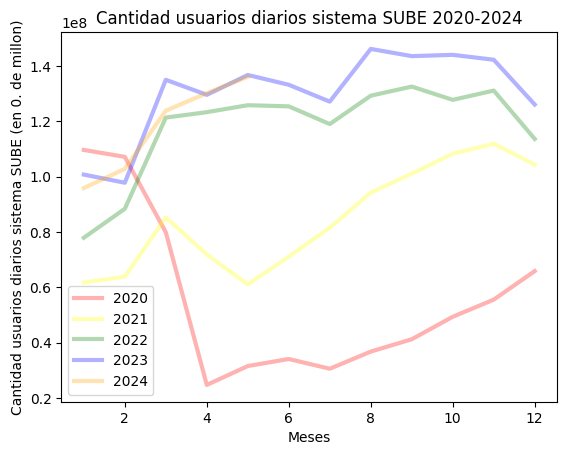

In [11]:
from copy import deepcopy

color_for_each_line = {2020: 'red', 2021: 'yellow', 2022: 'green', 2023: 'blue', 2024: 'orange'}

amount_of_monthly_registries_per_year_for_chart = deepcopy(amount_of_monthly_registries_per_year) # Deep copy needed so original dict is not modified
# Cleaning months of current year with no values
if last_month_as_today != 12 and year_still_in_progress:
    for m in range(last_month_as_today+1, 13):
        amount_of_monthly_registries_per_year_for_chart[current_year][m] = None # I use none so its not display on the chart     
    
for year in years:
    y_axis = []
    x_axis = months
    
    for v in amount_of_monthly_registries_per_year_for_chart[year].values():
        y_axis.append(v)
        
    plt.plot(x_axis, y_axis, color=color_for_each_line[year], alpha=0.3, linewidth=3, label=str(year))

plt.legend()
plt.xlabel('Meses')
plt.ylabel('Cantidad usuarios diarios sistema SUBE (en 0. de millon)')
plt.title('Cantidad usuarios diarios sistema SUBE 2020-2024')
plt.show()

En efecto se puede visualizar que lo valores de 2020-2021 impactan drasticamente en el promedio. Procedo a dibujar graficos de columnas comparativos por año para poder presentar esta diferencia de manera más representativa

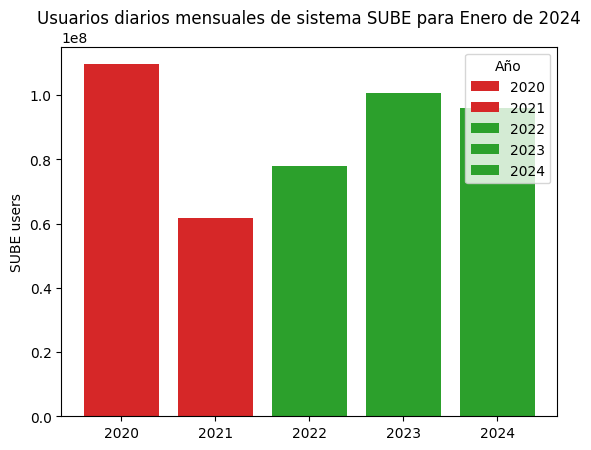

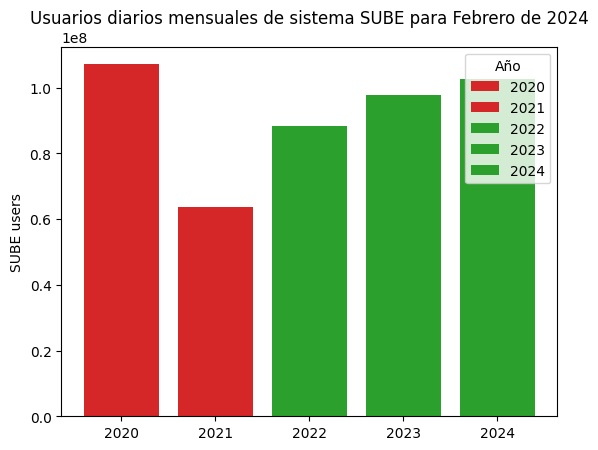

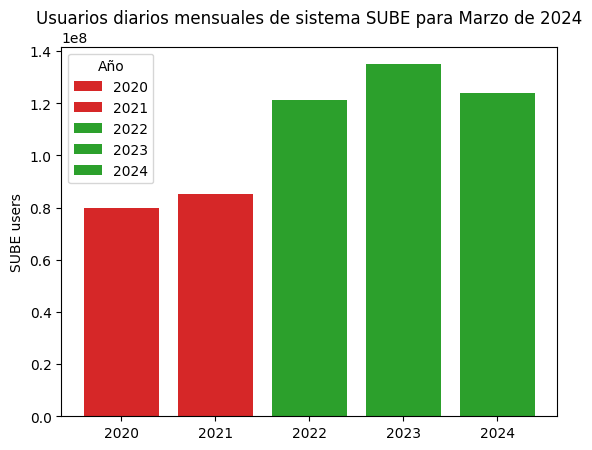

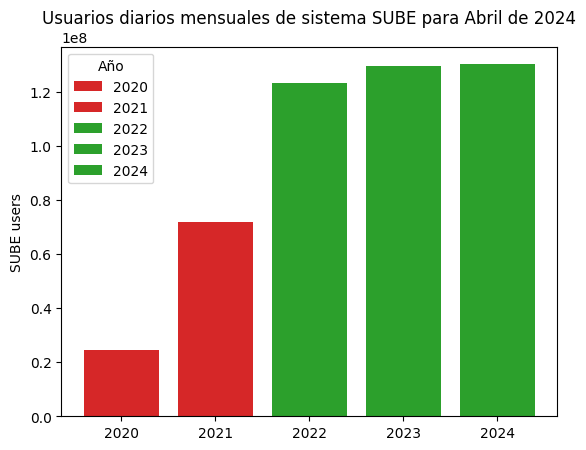

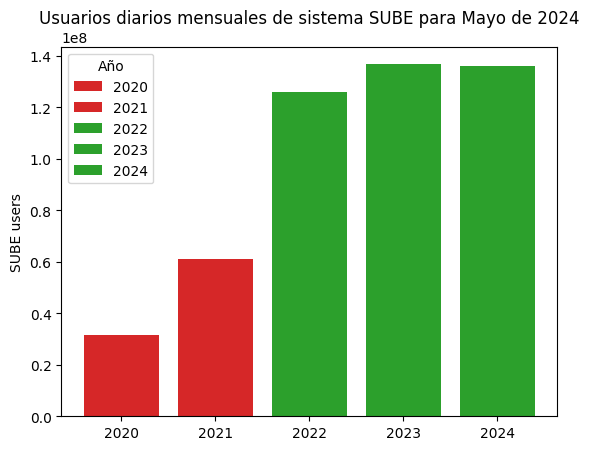

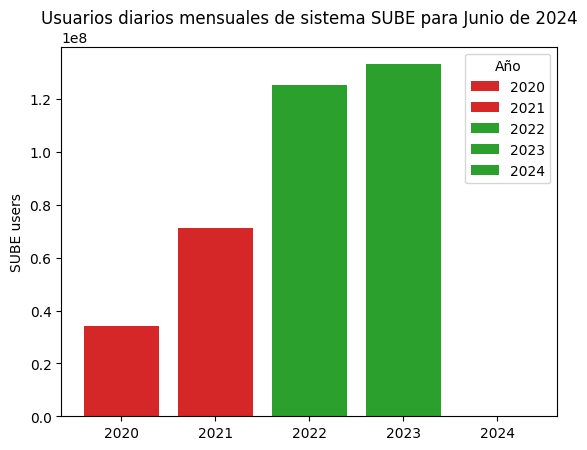

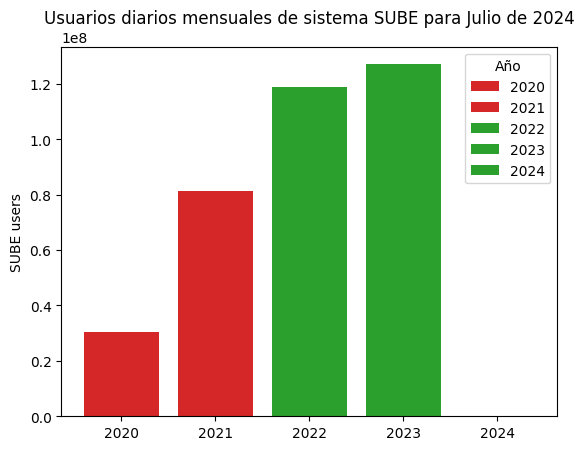

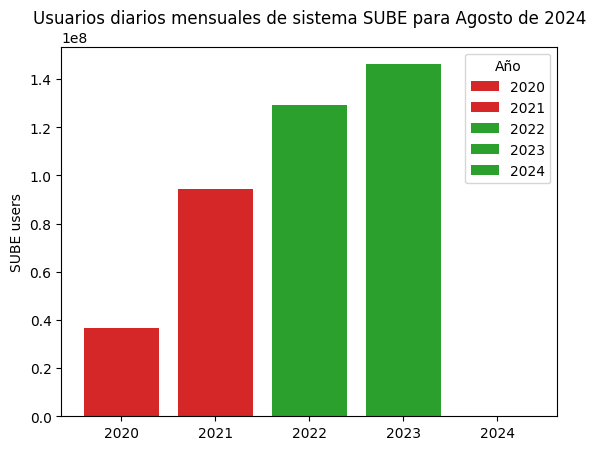

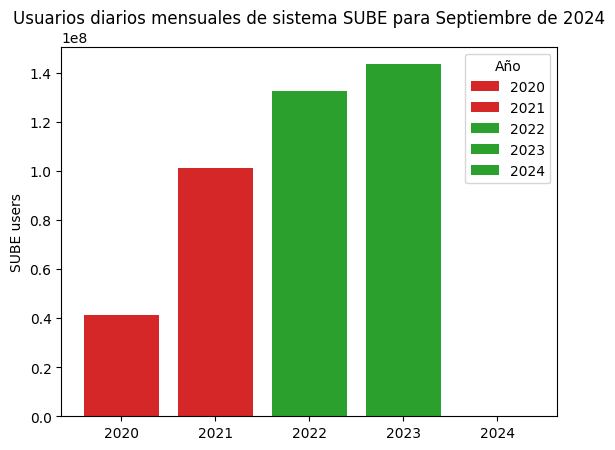

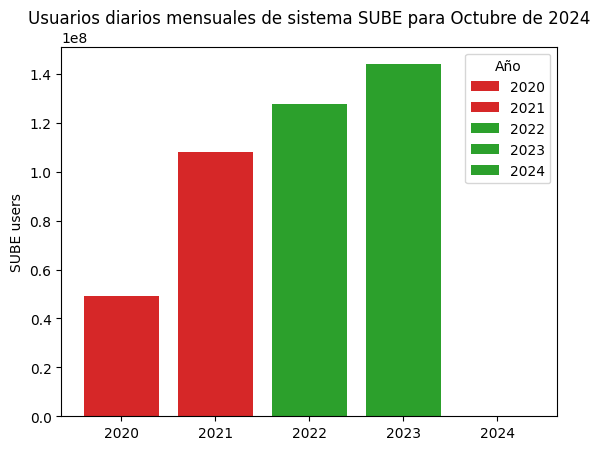

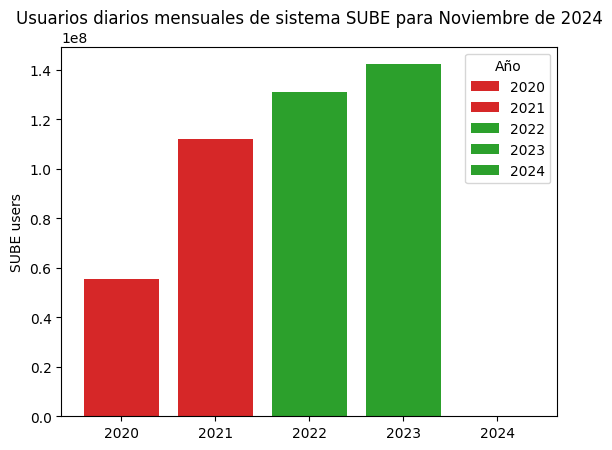

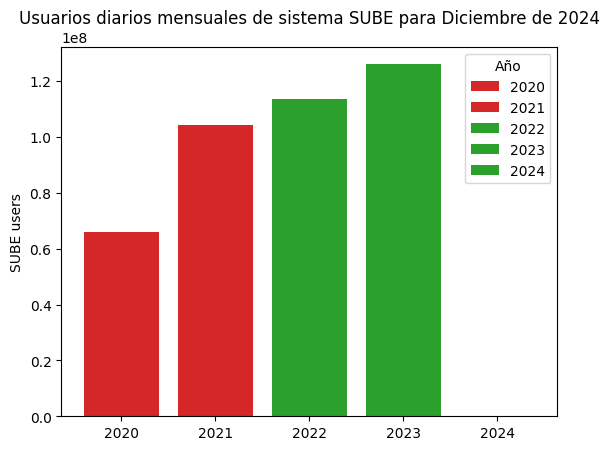

In [12]:
for month in months:
    users = []
    for year in years:
        users.append(amount_of_monthly_registries_per_year[year][month])
    
    # print(averages_for_month_by_year)
    fig, ax = plt.subplots()
    counts = users
    bar_labels = years
    bar_colors = ['tab:red', 'tab:red', 'tab:green', 'tab:green', 'tab:green']
    
    ax.bar(years, counts, label=bar_labels, color=bar_colors)
    
    ax.set_ylabel('SUBE users')
    ax.set_title(f'Usuarios diarios mensuales de sistema SUBE para {month_names[month]} de {year}')
    ax.legend(title='Año')
    
    plt.show()
    
        